In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import numpy as np
import pandas as pd
import os
import sklearn 

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import cv2
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import seaborn as sns 

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten

from tensorflow.keras.layers import Conv2D,MaxPool2D

from tensorflow.keras.layers import Input, Dense
from keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import regularizers
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from tensorflow.keras.applications.vgg16 import VGG16

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPool2D, BatchNormalization,Input,MaxPooling2D,GlobalMaxPooling2D,concatenate
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.applications import vgg19
from tensorflow.keras.callbacks import ModelCheckpoint,ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.backend as K
import tensorflow as tf
import os

In [ ]:
PATH = os.getcwd()
print(PATH)
PATH = r"/content/gdrive/MyDrive/out"
data_dir_list = os.listdir(PATH)
data_dir_list.sort(key=int)
print(data_dir_list)

/content
['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35']


In [ ]:
img_rows=32
img_cols=32
num_channel=3

num_epoch = 10
batch_size = 64

img_data_list=[]
classes_names_list=[]
target_column=[]

In [ ]:
for dataset in data_dir_list:
    classes_names_list.append(dataset)
    print("Getting images from {} folder\n".format(dataset))
    img_list = os.listdir(PATH+'/'+ dataset)
    for img in img_list:
        input_img = cv2.imread(PATH + '/' + dataset + '/' + img)
        input_img_resize=cv2.resize(input_img,(img_rows,img_cols))
        img_data_list.append(input_img_resize)
        target_column.append(dataset)

Getting images from 01 folder

Getting images from 02 folder

Getting images from 03 folder

Getting images from 04 folder

Getting images from 05 folder

Getting images from 06 folder

Getting images from 07 folder

Getting images from 08 folder

Getting images from 09 folder

Getting images from 10 folder

Getting images from 11 folder

Getting images from 12 folder

Getting images from 13 folder

Getting images from 14 folder

Getting images from 15 folder

Getting images from 16 folder

Getting images from 17 folder

Getting images from 18 folder

Getting images from 19 folder

Getting images from 20 folder

Getting images from 21 folder

Getting images from 22 folder

Getting images from 23 folder

Getting images from 24 folder

Getting images from 25 folder

Getting images from 26 folder

Getting images from 27 folder

Getting images from 28 folder

Getting images from 29 folder

Getting images from 30 folder

Getting images from 31 folder

Getting images from 32 folder

Getting 

In [ ]:
num_classes = len(classes_names_list)
print(num_classes)

35


In [ ]:
img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data /= 255
print(img_data.shape)
img_data

(38929, 32, 32, 3)


array([[[[0.39215687, 0.39215687, 0.3647059 ],
         [0.7607843 , 0.73333335, 0.6392157 ],
         [0.43529412, 0.44313726, 0.41568628],
         ...,
         [0.59607846, 0.5803922 , 0.56078434],
         [0.5411765 , 0.49411765, 0.44705883],
         [0.49019608, 0.42352942, 0.35686275]],

        [[0.28627452, 0.25882354, 0.22352941],
         [0.64705884, 0.60784316, 0.5372549 ],
         [0.38431373, 0.36862746, 0.35686275],
         ...,
         [0.5568628 , 0.5568628 , 0.53333336],
         [0.5254902 , 0.4862745 , 0.45490196],
         [0.47058824, 0.42745098, 0.3764706 ]],

        [[0.3882353 , 0.38039216, 0.34901962],
         [0.42745098, 0.39215687, 0.3372549 ],
         [0.5647059 , 0.56078434, 0.54509807],
         ...,
         [0.5294118 , 0.53333336, 0.5254902 ],
         [0.4627451 , 0.42352942, 0.39215687],
         [0.48235294, 0.45490196, 0.44313726]],

        ...,

        [[0.30588236, 0.35686275, 0.3647059 ],
         [0.29803923, 0.3254902 , 0.3372549 ]

In [ ]:
num_of_samples = img_data.shape[0]
input_shape = img_data[0].shape

In [ ]:
Labelencoder = LabelEncoder()
target_column = Labelencoder.fit_transform(target_column)
np.unique(target_column)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34])

In [ ]:
from keras.utils.np_utils import to_categorical

In [ ]:
target_column_hotcoded = to_categorical(target_column,num_classes)
X,Y = shuffle(img_data,target_column_hotcoded,random_state=2)
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [ ]:
filepath="/content/gdrive/MyDrive/model_weights/vgg(b&w).h5"
from keras.callbacks import ModelCheckpoint,EarlyStopping
best_model = ModelCheckpoint(filepath,
                             monitor='val_loss',
                             mode='min',
                             save_best_only=True,
                             verbose=1)
#from keras.callbacks import ModelCheckpoint
# autosave best Model
#best_model_file = "vggb&w.h5"
#best_model = ModelCheckpoint(best_model_file, monitor='val_loss', verbose=1, save_best_only=True)
early_stop=EarlyStopping(monitor='val_accuracy',patience=5, verbose=True)

In [ ]:
from tensorflow.keras.applications import vgg19
vgg = vgg19.VGG19(weights=None, include_top=False, input_shape = (32,32,3))
vgg.trainable=True                       
from tensorflow.keras import layers
print('Adding new layers...')
output = vgg.get_layer(index = -1).output  
output = Flatten()(output)
# let's add a fully-connected layer
#output = Dense(512,activation = "relu")(output)
#output = BatchNormalization()(output)
#output = Dropout(0.2)(output)
output = Dense(512,activation = "relu")(output)
output = BatchNormalization()(output)
output = Dropout(0.2)(output)
predictions = Dense(35, activation='softmax')(output)

Adding new layers...


In [ ]:
modelvgg = Model(inputs=vgg.input, outputs=predictions)

In [ ]:
modelvgg.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Total params: 20,307,043
Trainable params: 20,306,019
Non-trainable params: 1,024


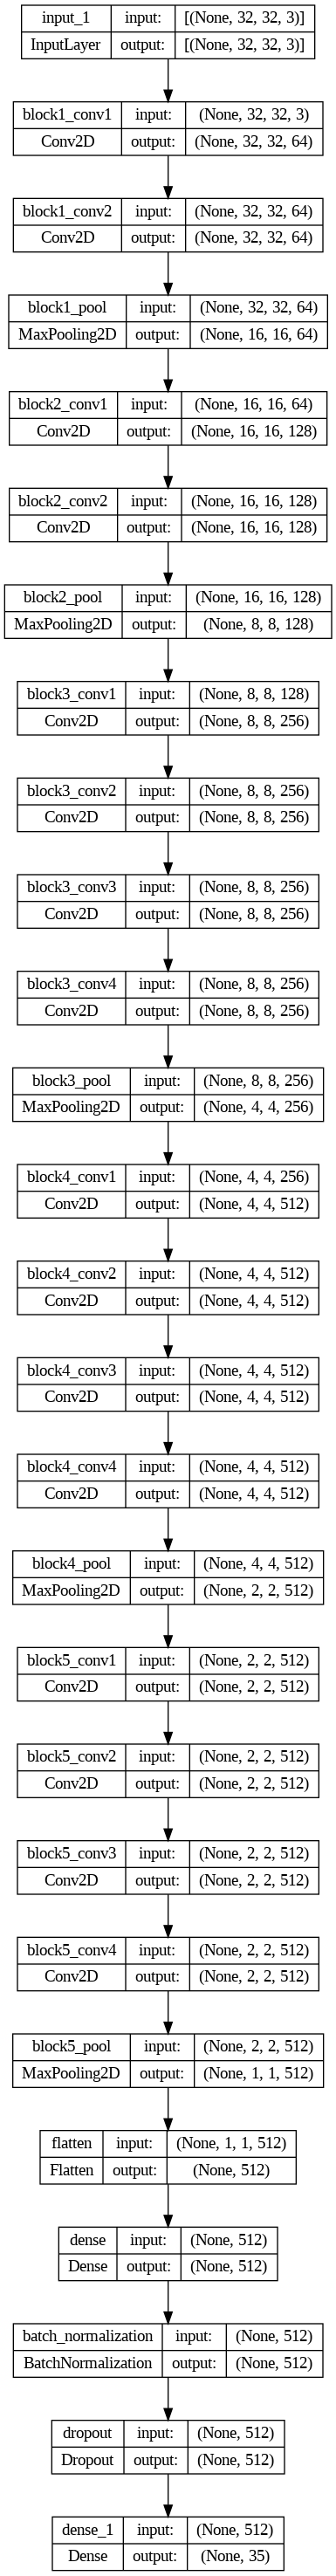

In [ ]:
trainable_count = np.sum([K.count_params(w) for w in modelvgg.trainable_weights])
non_trainable_count = np.sum([K.count_params(w) for w in modelvgg.non_trainable_weights])

print('Total params: {:,}'.format(trainable_count + non_trainable_count))
print('Trainable params: {:,}'.format(trainable_count))
print('Non-trainable params: {:,}'.format(non_trainable_count))
from keras.utils.vis_utils import plot_model
plot_model(modelvgg, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
# part - 2 -- Fitting the CNN to the images

In [ ]:
f=X_train*0.2
print(len(X_train))
print(len(f))
f

31143
31143


array([[[[0.16235295, 0.16313726, 0.15607844],
         [0.16313726, 0.16392158, 0.15686275],
         [0.16235295, 0.16313726, 0.15607844],
         ...,
         [0.15607844, 0.15607844, 0.15137255],
         [0.15764706, 0.15764706, 0.15294118],
         [0.16000001, 0.15843138, 0.15215687]],

        [[0.16313726, 0.16392158, 0.15686275],
         [0.16235295, 0.16313726, 0.15607844],
         [0.16235295, 0.16313726, 0.15607844],
         ...,
         [0.15529412, 0.15529412, 0.15058824],
         [0.15607844, 0.15607844, 0.15137255],
         [0.15607844, 0.15450981, 0.1482353 ]],

        [[0.16156863, 0.16235295, 0.15529412],
         [0.16156863, 0.16235295, 0.15529412],
         [0.16000001, 0.16078432, 0.15372549],
         ...,
         [0.15529412, 0.15529412, 0.15058824],
         [0.15372549, 0.15372549, 0.14901961],
         [0.15294118, 0.15372549, 0.14666668]],

        ...,

        [[0.13568628, 0.1364706 , 0.13333334],
         [0.13490197, 0.13568628, 0.13254903]

In [ ]:
res = modelvgg.fit(X_train,y_train, epochs=30,
                              #steps_per_epoch=364
                              batch_size=64,
                              callbacks=[best_model, early_stop],
                              validation_split=0.2,
                             #validation_steps=971,
                           
                   )

Epoch 1/30
390/390 [==============================] - ETA: 0s - loss: 2.3213 - accuracy: 0.2595
Epoch 1: val_loss improved from inf to 13.10416, saving model to /content/gdrive/MyDrive/model_weights/vgg(b&w).h5
390/390 [==============================] - 37s 69ms/step - loss: 2.3213 - accuracy: 0.2595 - val_loss: 13.1042 - val_accuracy: 0.0939
Epoch 2/30
389/390 [============================>.] - ETA: 0s - loss: 1.1583 - accuracy: 0.6025
Epoch 2: val_loss improved from 13.10416 to 2.57624, saving model to /content/gdrive/MyDrive/model_weights/vgg(b&w).h5
390/390 [==============================] - 21s 53ms/step - loss: 1.1580 - accuracy: 0.6026 - val_loss: 2.5762 - val_accuracy: 0.2015
Epoch 3/30
390/390 [==============================] - ETA: 0s - loss: 0.5522 - accuracy: 0.8512
Epoch 3: val_loss improved from 2.57624 to 1.16198, saving model to /content/gdrive/MyDrive/model_weights/vgg(b&w).h5
390/390 [==============================] - 21s 53ms/step - loss: 0.5522 - accuracy: 0.8512 - 

In [ ]:
modelvgg.load_weights('/content/gdrive/MyDrive/model_weights/vgg(b&w)1.h5')

In [ ]:

score = modelvgg.evaluate(X_test,y_test,batch_size=64)
print('Test Loss',score[0])
print("Test Accuracy",score[1])

122/122 [==============================] - 2s 18ms/step - loss: 0.0054 - accuracy: 0.9987
Test Loss 0.0054415431804955006
Test Accuracy 0.9987156391143799


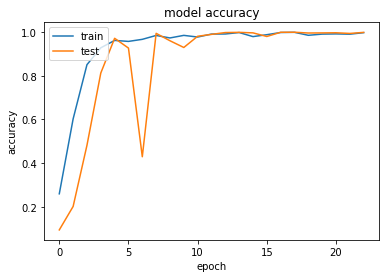

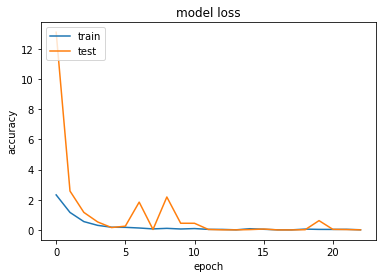

In [ ]:
#Summarize hist for accuracy
plt.plot(res.history['accuracy'])
plt.plot(res.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc = 'upper left')
plt.show()

#summarize hist for loss
plt.plot(res.history['loss'])
plt.plot(res.history['val_loss'])
plt.title('model loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc = 'upper left')
plt.show()

In [ ]:
preds = np.round(modelvgg.predict((X_test)),0)
print("rounded test_labels",preds)

244/244 [==============================] - 3s 11ms/step
rounded test_labels [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
test_labels = np.array((y_test))

In [ ]:
experiment_labels = ['01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','32','33','34','35']
classification_metrics = metrics.classification_report(test_labels,preds,target_names=experiment_labels)
print(classification_metrics)

              precision    recall  f1-score   support

          01       1.00      1.00      1.00       246
          02       1.00      0.99      1.00       200
          03       1.00      1.00      1.00       216
          04       1.00      1.00      1.00       233
          05       1.00      1.00      1.00       239
          06       1.00      1.00      1.00       203
          07       1.00      1.00      1.00       206
          08       1.00      1.00      1.00       238
          09       1.00      1.00      1.00       210
          10       1.00      1.00      1.00       214
          11       1.00      1.00      1.00       242
          12       1.00      1.00      1.00       206
          13       1.00      1.00      1.00       235
          14       1.00      1.00      1.00       222
          15       1.00      1.00      1.00       240
          16       1.00      1.00      1.00       233
          17       1.00      1.00      1.00       221
          18       1.00    

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
test_labels = np.array((y_test))

487/487 [==============================] - 5s 10ms/step


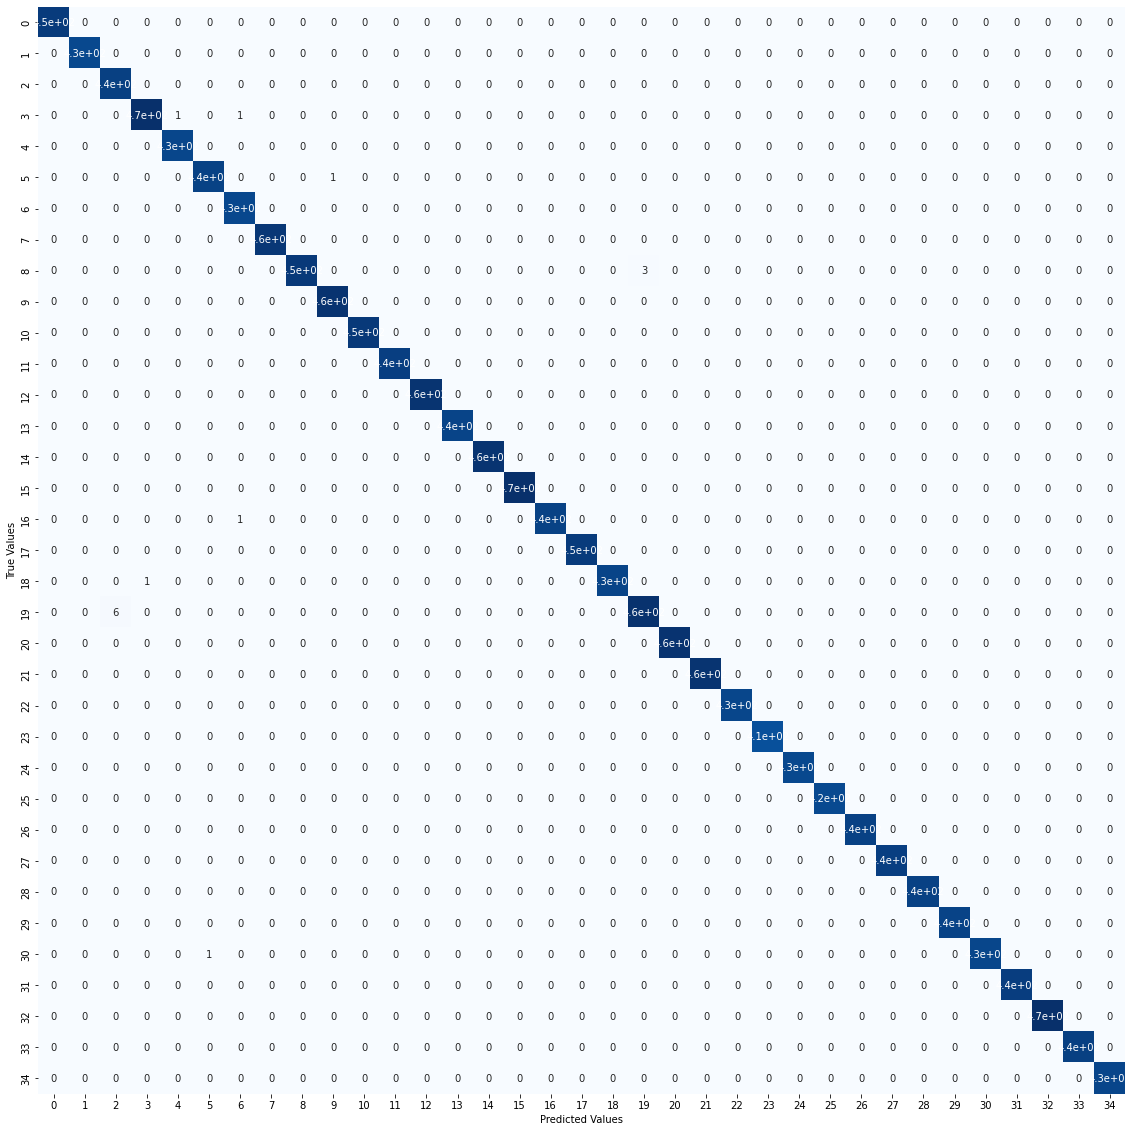

In [ ]:
fig = plt.figure(figsize=(20, 20))

pred = modelvgg.predict(X_test)

pred = np.argmax(pred, 1)
test = np.argmax(y_test, 1)

mat = confusion_matrix(test,pred)

# Plot Confusion matrix
sns.heatmap(mat.T, square=True, annot=True, cbar=False, cmap=plt.cm.Blues)
plt.xlabel('Predicted Values')
plt.ylabel('True Values');
plt.show();

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=2)

In [ ]:
modelvgg1 = Model(inputs=vgg.input, outputs=predictions)
modelvgg1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
filepath="/content/gdrive/MyDrive/model_weights/vgg(b&w)1.h5"
from keras.callbacks import ModelCheckpoint,EarlyStopping
best_model = ModelCheckpoint(filepath,
                             monitor='val_loss',
                             mode='min',
                             save_best_only=True,
                             verbose=1)
#from keras.callbacks import ModelCheckpoint
# autosave best Model
#best_model_file = "vggb&w.h5"
#best_model = ModelCheckpoint(best_model_file, monitor='val_loss', verbose=1, save_best_only=True)
early_stop=EarlyStopping(monitor='val_accuracy',patience=5, verbose=True)

In [ ]:
res2 = modelvgg1.fit(X_train,y_train, epochs=30,
                              #steps_per_epoch=364
                              batch_size=64,
                              callbacks=[best_model, early_stop],
                              validation_split=0.2,
                             #validation_steps=971,
                           
                   )

Epoch 1/30
341/341 [==============================] - ETA: 0s - loss: 0.0756 - accuracy: 0.9766
Epoch 1: val_loss improved from inf to 0.05275, saving model to /content/gdrive/MyDrive/model_weights/vgg(b&w)1.h5
341/341 [==============================] - 20s 56ms/step - loss: 0.0756 - accuracy: 0.9766 - val_loss: 0.0527 - val_accuracy: 0.9851
Epoch 2/30
340/341 [============================>.] - ETA: 0s - loss: 0.0499 - accuracy: 0.9858
Epoch 2: val_loss improved from 0.05275 to 0.02321, saving model to /content/gdrive/MyDrive/model_weights/vgg(b&w)1.h5
341/341 [==============================] - 18s 53ms/step - loss: 0.0500 - accuracy: 0.9857 - val_loss: 0.0232 - val_accuracy: 0.9939
Epoch 3/30
341/341 [==============================] - ETA: 0s - loss: 0.0441 - accuracy: 0.9881
Epoch 3: val_loss did not improve from 0.02321
341/341 [==============================] - 16s 48ms/step - loss: 0.0441 - accuracy: 0.9881 - val_loss: 0.0381 - val_accuracy: 0.9888
Epoch 4/30
340/341 [============

In [ ]:
modelvgg1.load_weights('/content/gdrive/MyDrive/model_weights/vgg(b&w)1.h5')

In [ ]:

score = modelvgg1.evaluate(X_test,y_test,batch_size=64)
print('Test Loss',score[0])
print("Test Accuracy",score[1])

183/183 [==============================] - 3s 16ms/step - loss: 0.0131 - accuracy: 0.9972
Test Loss 0.013095955364406109
Test Accuracy 0.9971744418144226


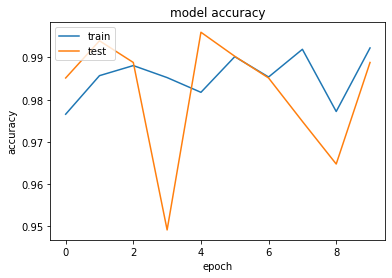

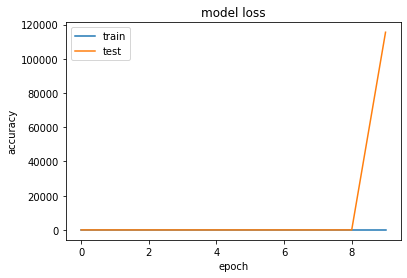

In [ ]:
#Summarize hist for accuracy
plt.plot(res2.history['accuracy'])
plt.plot(res2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc = 'upper left')
plt.show()

#summarize hist for loss
plt.plot(res2.history['loss'])
plt.plot(res2.history['val_loss'])
plt.title('model loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc = 'upper left')
plt.show()

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.4,random_state=2)

In [ ]:
X_train.shape

(23357, 32, 32, 3)

In [ ]:
modelvgg2 = Model(inputs=vgg.input, outputs=predictions)
modelvgg2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
filepath="/content/gdrive/MyDrive/model_weights/vgg(b&w)2.h5"
from keras.callbacks import ModelCheckpoint,EarlyStopping
best_model = ModelCheckpoint(filepath,
                             monitor='val_loss',
                             mode='min',
                             save_best_only=True,
                             verbose=1)
#from keras.callbacks import ModelCheckpoint
# autosave best Model
#best_model_file = "vggb&w.h5"
#best_model = ModelCheckpoint(best_model_file, monitor='val_loss', verbose=1, save_best_only=True)
early_stop=EarlyStopping(monitor='val_accuracy',patience=5, verbose=True)

In [ ]:
res1 = modelvgg2.fit(X_train,y_train, epochs=30,
                              #steps_per_epoch=364
                              batch_size=64,
                              callbacks=[best_model, early_stop],
                              validation_split=0.2,
                             #validation_steps=971,
                           
                   )

Epoch 1/30
292/292 [==============================] - ETA: 0s - loss: 0.0544 - accuracy: 0.9845
Epoch 1: val_loss did not improve from 0.01465
292/292 [==============================] - 14s 47ms/step - loss: 0.0544 - accuracy: 0.9845 - val_loss: 0.0296 - val_accuracy: 0.9934
Epoch 2/30
292/292 [==============================] - ETA: 0s - loss: 0.0627 - accuracy: 0.9827
Epoch 2: val_loss did not improve from 0.01465
292/292 [==============================] - 14s 48ms/step - loss: 0.0627 - accuracy: 0.9827 - val_loss: 0.0331 - val_accuracy: 0.9934
Epoch 3/30
291/292 [============================>.] - ETA: 0s - loss: 0.0533 - accuracy: 0.9848
Epoch 3: val_loss did not improve from 0.01465
292/292 [==============================] - 14s 48ms/step - loss: 0.0532 - accuracy: 0.9848 - val_loss: 0.0217 - val_accuracy: 0.9938
Epoch 4/30
291/292 [============================>.] - ETA: 0s - loss: 0.0220 - accuracy: 0.9938
Epoch 4: val_loss did not improve from 0.01465
292/292 [====================

In [ ]:
modelvgg2.load_weights('/content/gdrive/MyDrive/model_weights/vgg(b&w)2.h5')

In [ ]:

score = modelvgg2.evaluate(X_test,y_test,batch_size=64)
print('Test Loss',score[0])
print("Test Accuracy",score[1])

244/244 [==============================] - 4s 15ms/step - loss: 0.0042 - accuracy: 0.9990
Test Loss 0.004195073619484901
Test Accuracy 0.9990367293357849


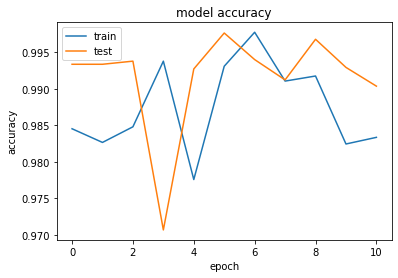

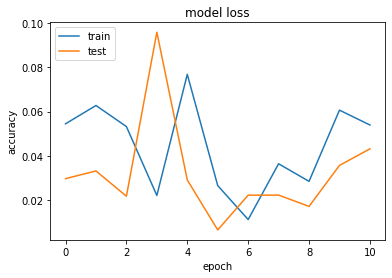

In [ ]:
#Summarize hist for accuracy
plt.plot(res1.history['accuracy'])
plt.plot(res1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc = 'upper left')
plt.show()

#summarize hist for loss
plt.plot(res1.history['loss'])
plt.plot(res1.history['val_loss'])
plt.title('model loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc = 'upper left')
plt.show()